In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from robo_limb_ml.models.fk_lstm import FK_LSTM
from robo_limb_ml.models.fk_mlp import FK_MLP
from robo_limb_ml.models.fk_rnn import FK_RNN
from robo_limb_ml.models.fk_seq2seq import FK_SEQ2SEQ
from robo_limb_ml.utils.utils import rollout
from tqdm import tqdm



In [2]:
def viz_graph(outputs_df, test_df, run_name, display_window=1500):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs[0, 0].plot(test_df["time_begin"][:display_window], test_df["theta_x"][:display_window], label="Actual")
    axs[0, 0].plot(outputs_df["time_begin"][:display_window], outputs_df["theta_x"][:display_window], label="Predicted")
    axs[0, 0].set_title("Theta X")
    axs[0, 0].legend()
    axs[0, 1].plot(test_df["time_begin"][:display_window], test_df["theta_y"][:display_window], label="Actual")
    axs[0, 1].plot(outputs_df["time_begin"][:display_window], outputs_df["theta_y"][:display_window], label="Predicted")
    axs[0, 1].set_title("Theta Y")
    axs[0, 1].legend()
    axs[1, 0].plot(test_df["time_begin"][:display_window], test_df["vel_x"][:display_window], label="Actual")
    axs[1, 0].plot(outputs_df["time_begin"][:display_window], outputs_df["vel_x"][:display_window], label="Predicted")
    axs[1, 0].set_title("Vel X")
    axs[1, 0].legend()
    axs[1, 1].plot(test_df["time_begin"][:display_window], test_df["vel_y"][:display_window], label="Actual")
    axs[1, 1].plot(outputs_df["time_begin"][:display_window], outputs_df["vel_y"][:display_window], label="Predicted")
    axs[1, 1].legend()
    axs[1, 1].set_title("Vel Y")
    fig.suptitle(run_name, fontsize=16)
    return fig

  0%|          | 0/42 [00:00<?, ?it/s]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_d

device of LSTM cuda


100%|██████████| 31256/31256 [00:21<00:00, 1423.69it/s]


R^2 0.8340551853179932
RMSE 10.286263465881348


  2%|▏         | 1/42 [00:22<15:26, 22.60s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load

device of LSTM cuda


100%|██████████| 31256/31256 [00:21<00:00, 1426.03it/s]


R^2 0.8012274503707886
RMSE 11.619878768920898


  5%|▍         | 2/42 [00:45<15:02, 22.56s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load

device of LSTM cuda


  7%|▋         | 3/42 [01:52<27:59, 43.05s/it]

R^2 0.8431379199028015
RMSE 9.748956680297852
device of LSTM cuda


/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locatio

R^2 0.8156172037124634
RMSE 10.794065475463867


/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locati

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


100%|██████████| 31256/31256 [00:37<00:00, 829.97it/s]


R^2 0.85394686460495
RMSE 9.337796211242676


 26%|██▌       | 11/42 [03:38<07:45, 15.01s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.lo

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


100%|██████████| 31256/31256 [00:37<00:00, 841.55it/s]


R^2 0.85394686460495
RMSE 9.337796211242676


 29%|██▊       | 12/42 [04:16<09:06, 18.21s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.lo

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


 36%|███▌      | 15/42 [05:29<09:13, 20.51s/it]

R^2 0.868349015712738
RMSE 8.600626945495605
device of SEQ2SEQ_Encoder cuda


/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locati

device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


100%|██████████| 31216/31216 [01:13<00:00, 426.74it/s]


R^2 0.868349015712738
RMSE 8.600626945495605


 38%|███▊      | 16/42 [06:43<12:23, 28.60s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.lo

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


100%|██████████| 31256/31256 [00:27<00:00, 1149.14it/s]


R^2 0.8536033630371094
RMSE 9.450234413146973


 45%|████▌     | 19/42 [07:11<08:03, 21.00s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.lo

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


100%|██████████| 31216/31216 [01:10<00:00, 442.50it/s]


R^2 0.8405373692512512
RMSE 9.830313682556152


 48%|████▊     | 20/42 [08:22<10:36, 28.93s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.lo

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


100%|██████████| 31216/31216 [01:10<00:00, 441.52it/s]


R^2 0.8647196292877197
RMSE 8.856484413146973


 50%|█████     | 21/42 [09:33<12:51, 36.75s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.lo

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


100%|██████████| 31216/31216 [01:10<00:00, 441.52it/s]


R^2 0.8474089503288269
RMSE 9.345168113708496


 52%|█████▏    | 22/42 [10:45<14:39, 43.98s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.lo

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


 55%|█████▍    | 23/42 [11:56<15:54, 50.25s/it]

R^2 0.8513147830963135
RMSE 9.161441802978516
device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locati

R^2 0.8256846070289612
RMSE 9.920303344726562


 57%|█████▋    | 24/42 [13:11<16:55, 56.41s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.lo

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


 60%|█████▉    | 25/42 [14:26<17:19, 61.16s/it]

R^2 0.8222536444664001
RMSE 10.10603141784668
device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locati

R^2 0.8275905847549438
RMSE 9.947203636169434


 62%|██████▏   | 26/42 [15:40<17:13, 64.57s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.lo

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


100%|██████████| 31216/31216 [01:10<00:00, 440.68it/s]


R^2 0.8717794418334961
RMSE 8.521540641784668


 64%|██████▍   | 27/42 [16:51<16:37, 66.51s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.lo

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


 67%|██████▋   | 28/42 [18:03<15:51, 67.93s/it]

R^2 0.8097886443138123
RMSE 7.9858527183532715
device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locati

R^2 0.8033401966094971
RMSE 8.157366752624512
device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locati

R^2 0.807999312877655
RMSE 8.11268138885498


 71%|███████▏  | 30/42 [20:26<13:56, 69.72s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.lo

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


100%|██████████| 31243/31243 [01:11<00:00, 440.01it/s]
/tmp/ipykernel_56224/598678628.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(2, 2, figsize=(10, 8))


R^2 0.8096827268600464
RMSE 8.056539535522461


 74%|███████▍  | 31/42 [21:38<12:53, 70.34s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.lo

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


 76%|███████▌  | 32/42 [22:52<11:54, 71.42s/it]

R^2 0.8051571249961853
RMSE 7.751100063323975
device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locati

R^2 0.8114034533500671
RMSE 7.64377498626709


/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locati

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


 81%|████████  | 34/42 [25:20<09:41, 72.72s/it]

R^2 0.8047457933425903
RMSE 8.096461296081543
device of SEQ2SEQ_Encoder cuda


/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locati

device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


 83%|████████▎ | 35/42 [26:34<08:31, 73.13s/it]

R^2 0.8214308619499207
RMSE 7.630265235900879
device of LSTM cuda


/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locatio

R^2 0.799536406993866
RMSE 8.39312744140625


 86%|████████▌ | 36/42 [27:42<07:10, 71.77s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.loa

device of LSTM cuda


100%|██████████| 31243/31243 [01:13<00:00, 423.49it/s]


R^2 0.8090196847915649
RMSE 8.279919624328613


 88%|████████▊ | 37/42 [28:57<06:02, 72.54s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.loa

device of LSTM cuda


100%|██████████| 31243/31243 [03:40<00:00, 141.61it/s]


R^2 0.7994519472122192
RMSE 8.423823356628418


 90%|█████████ | 38/42 [32:38<07:48, 117.08s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.lo

device of LSTM cuda


100%|██████████| 31243/31243 [03:37<00:00, 143.67it/s]


R^2 0.8124176859855652
RMSE 8.169615745544434


 93%|█████████▎| 39/42 [36:16<07:22, 147.34s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.lo

device of LSTM cuda


100%|██████████| 28885/28885 [03:23<00:00, 141.82it/s]


R^2 0.7208493947982788
RMSE 8.884821891784668


 95%|█████████▌| 40/42 [39:40<05:28, 164.36s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.l

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


100%|██████████| 28885/28885 [03:42<00:00, 129.68it/s]


R^2 0.7176584005355835
RMSE 9.000277519226074


 98%|█████████▊| 41/42 [43:23<03:02, 182.10s/it]/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.l

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


100%|██████████| 28885/28885 [03:34<00:00, 134.91it/s]


R^2 0.6763671636581421
RMSE 9.801041603088379


100%|██████████| 42/42 [46:59<00:00, 67.12s/it] 


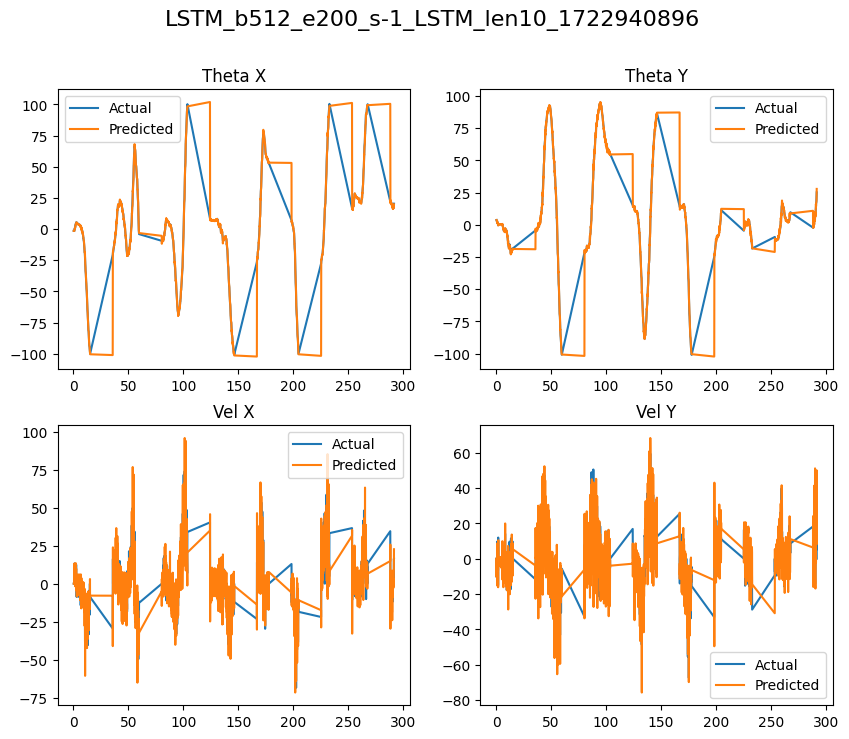

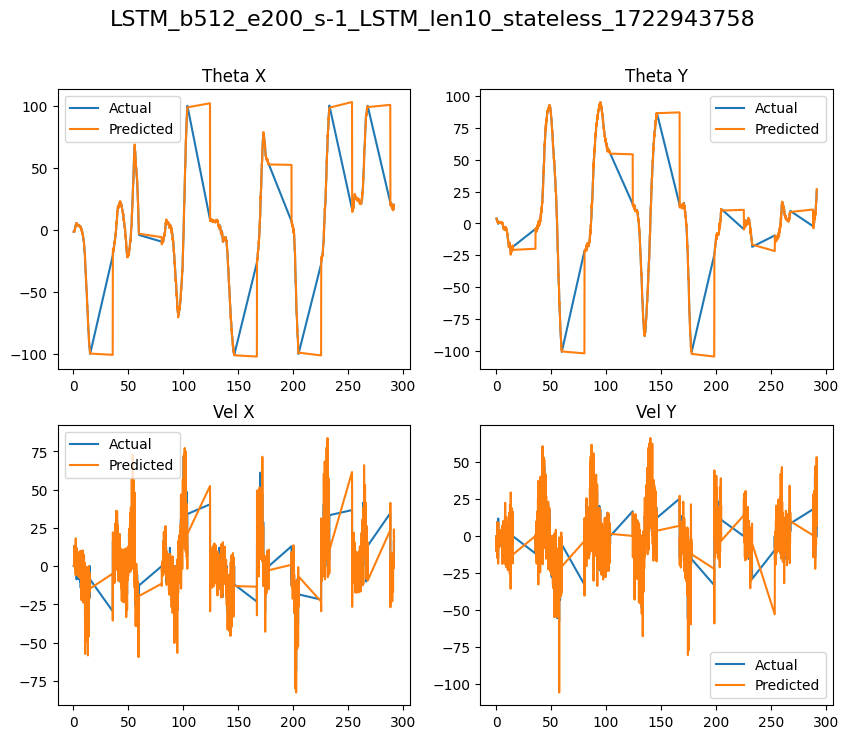

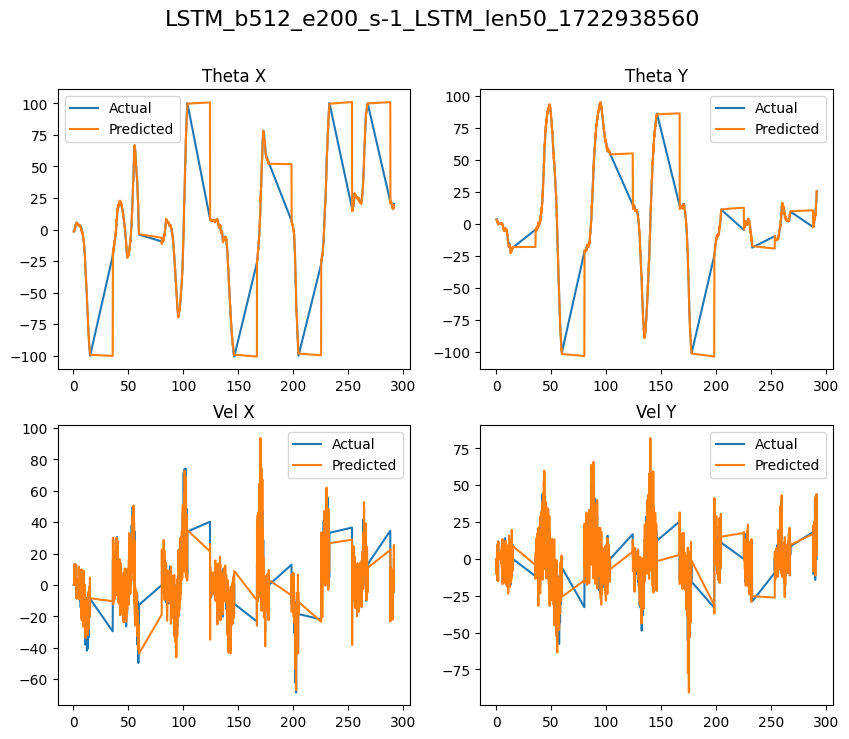

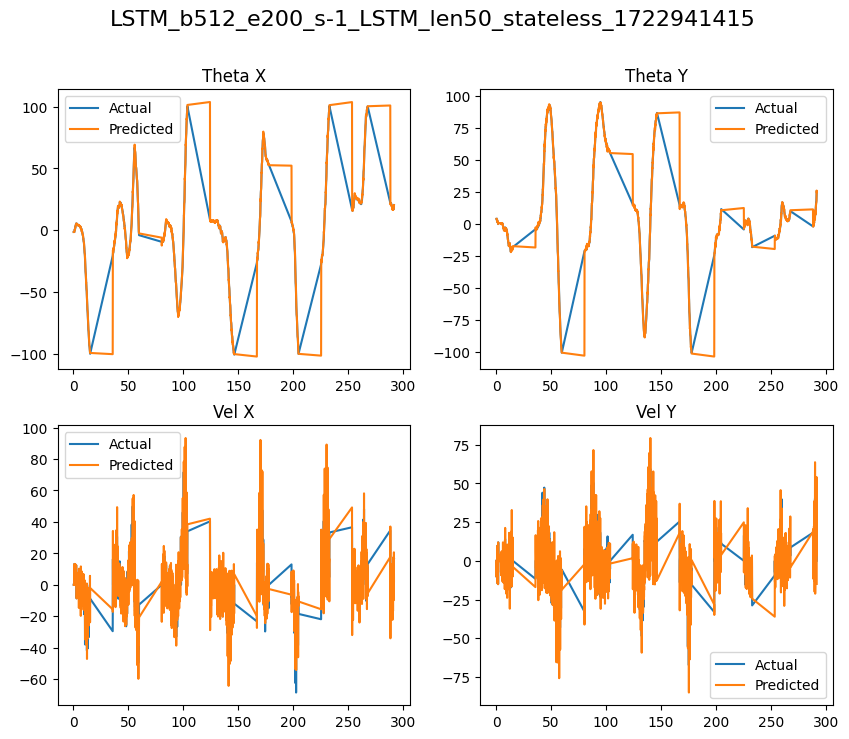

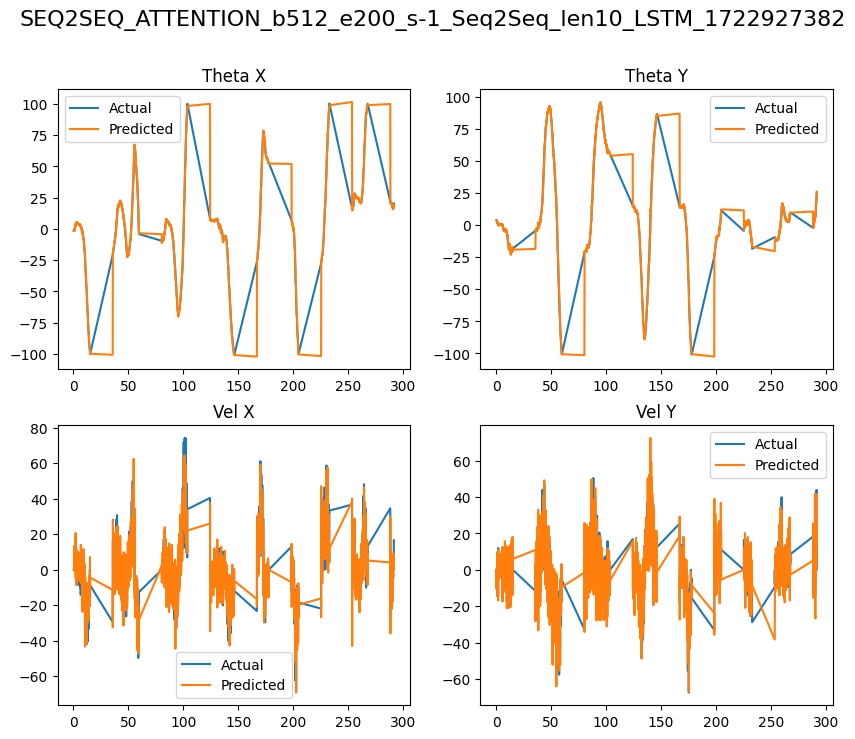

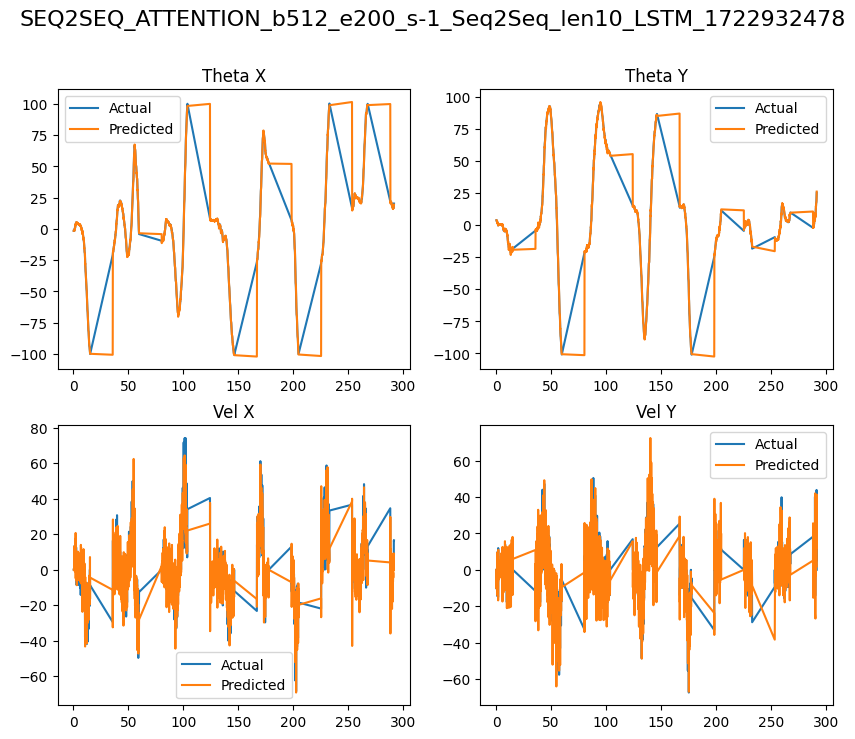

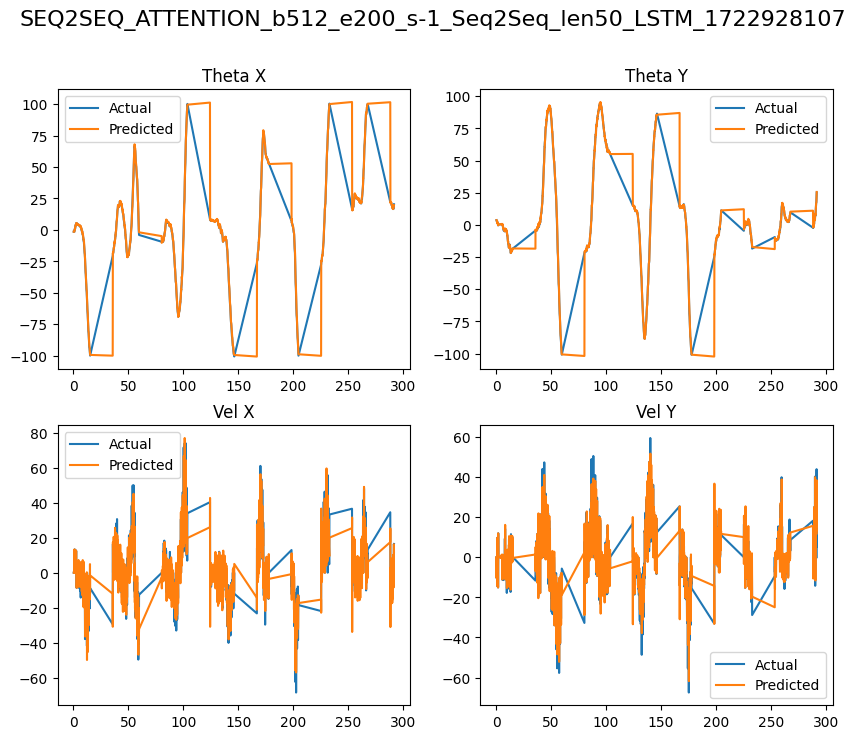

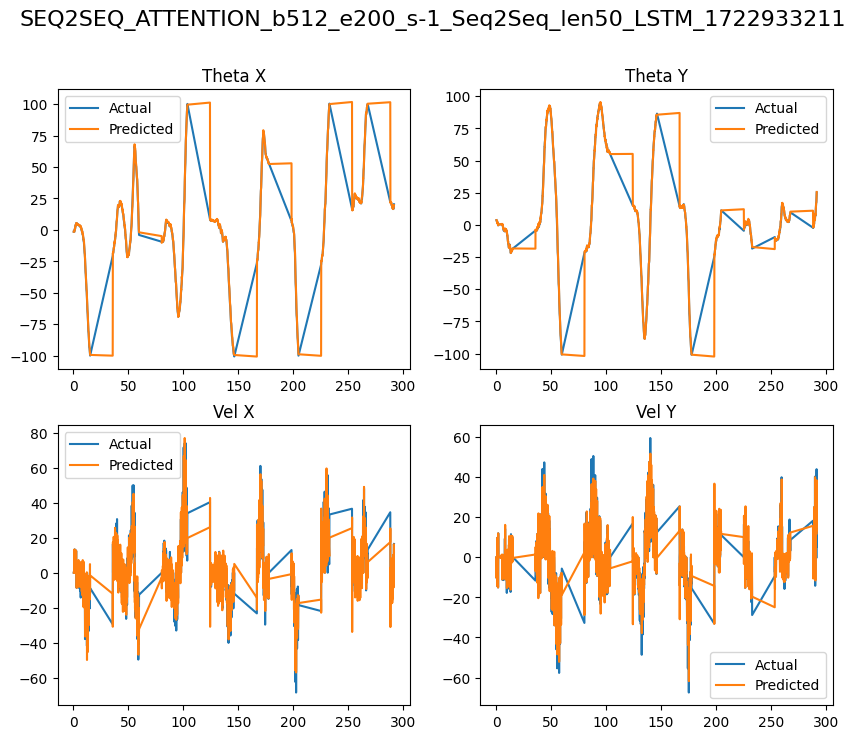

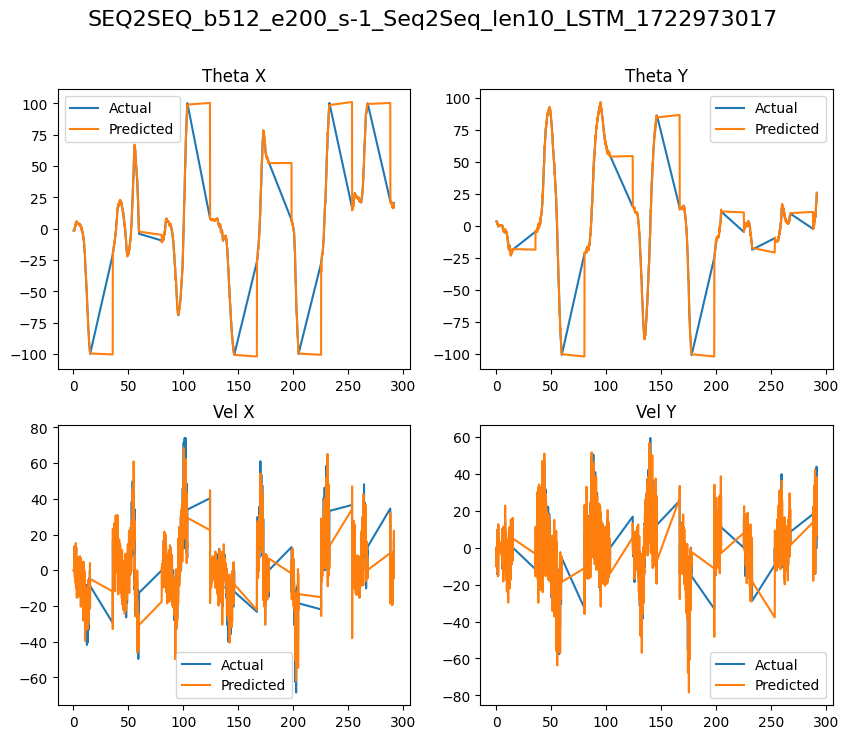

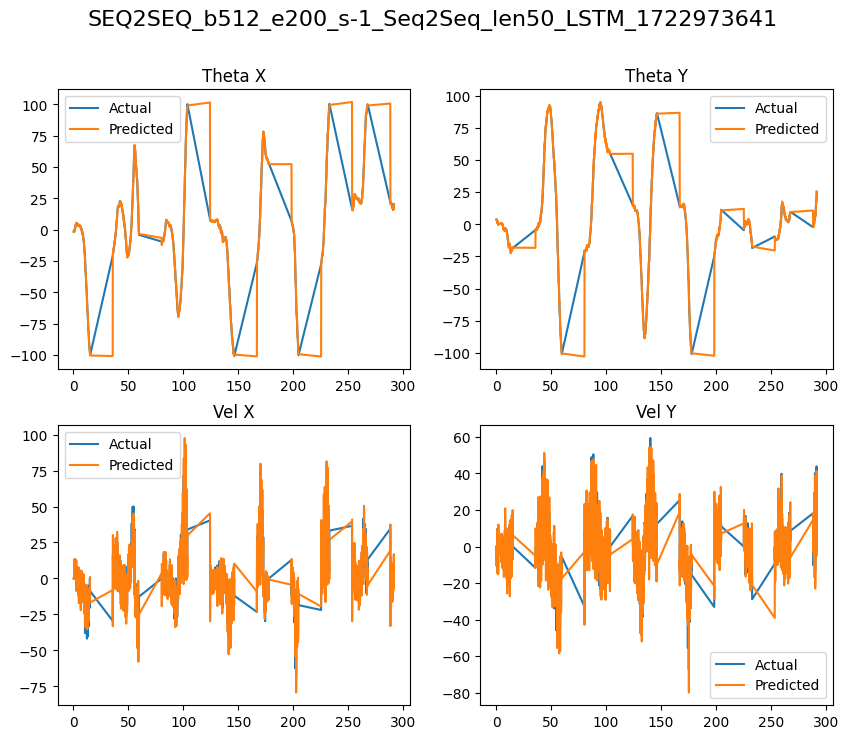

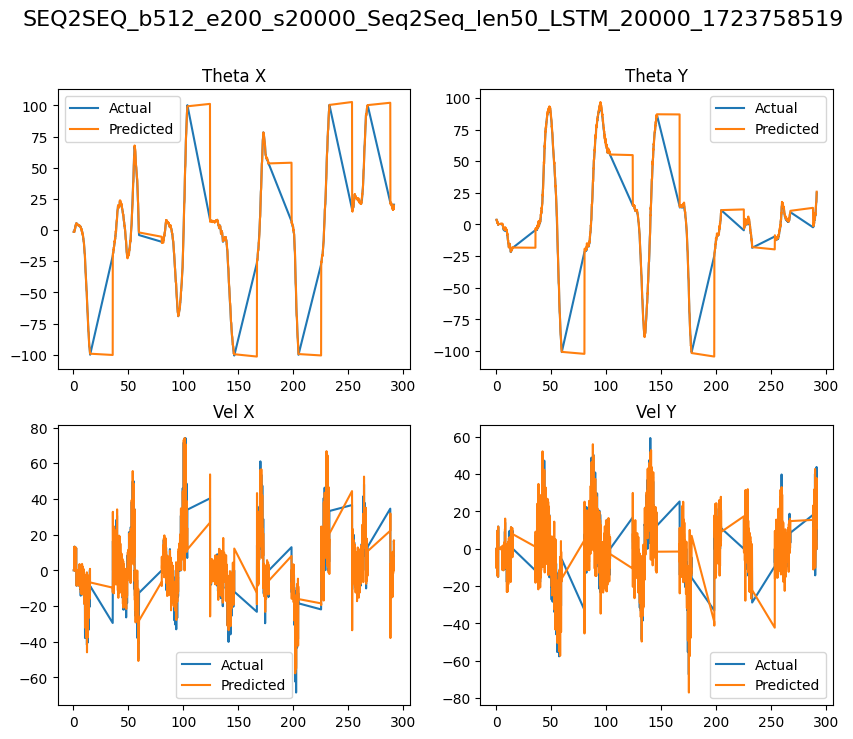

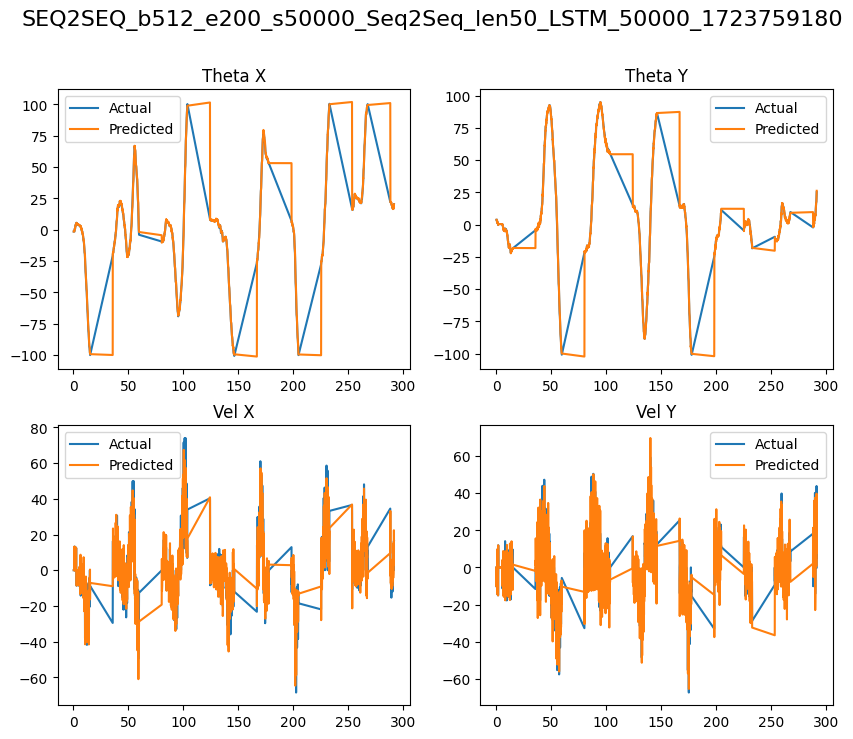

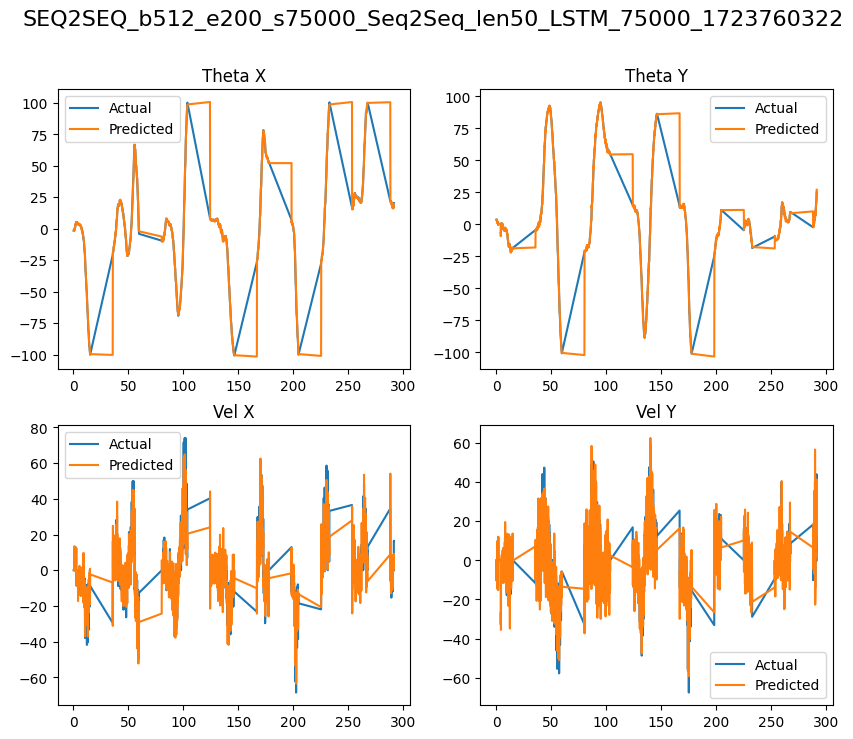

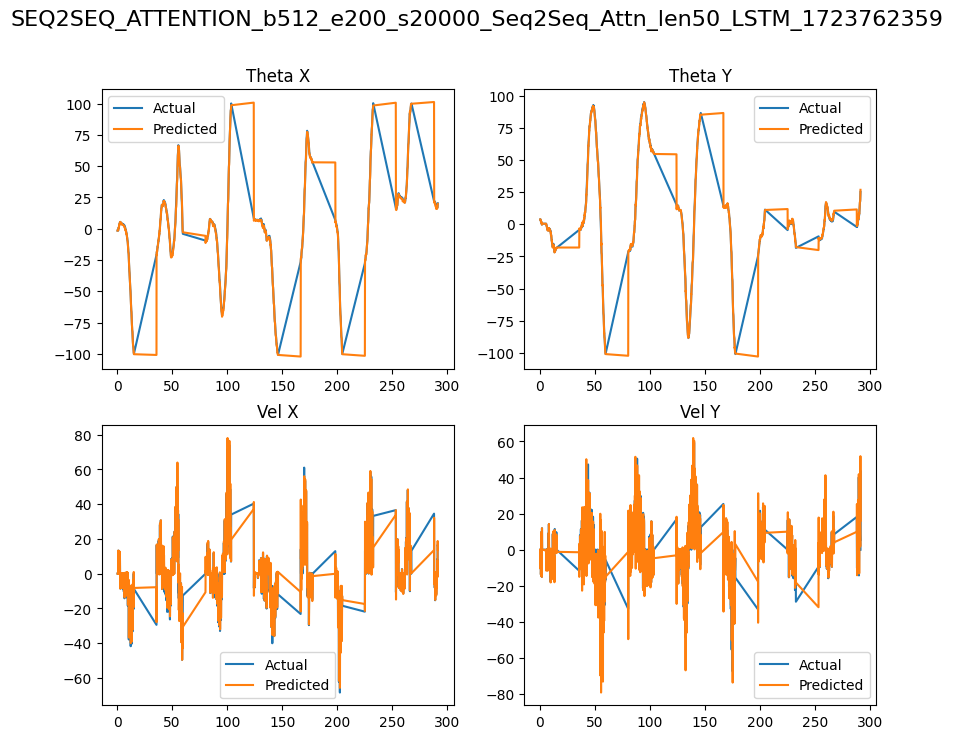

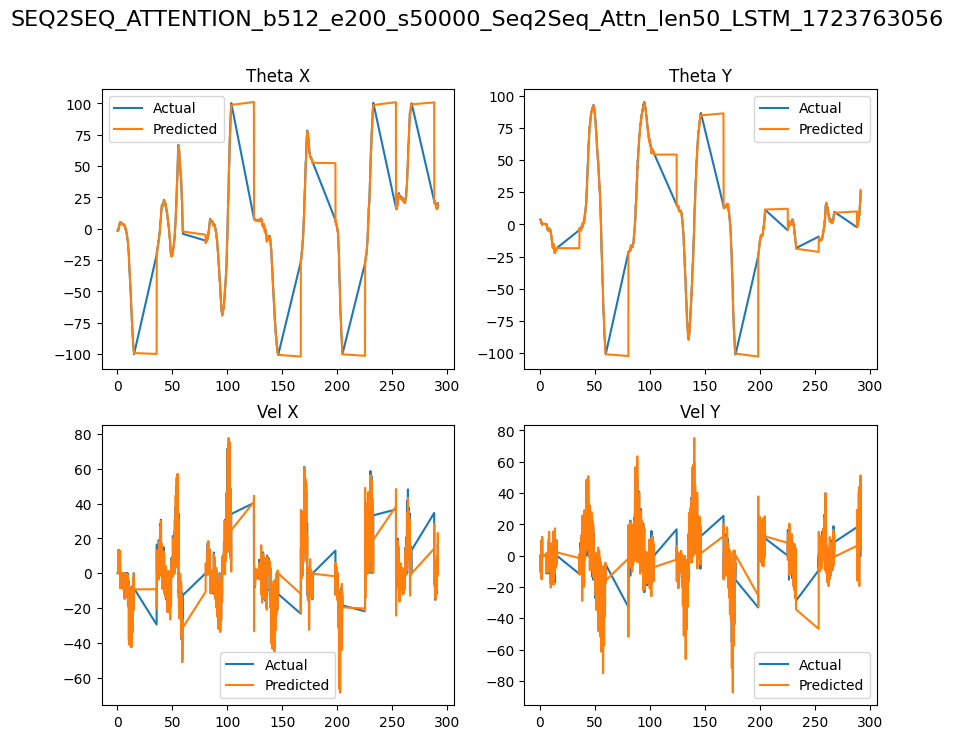

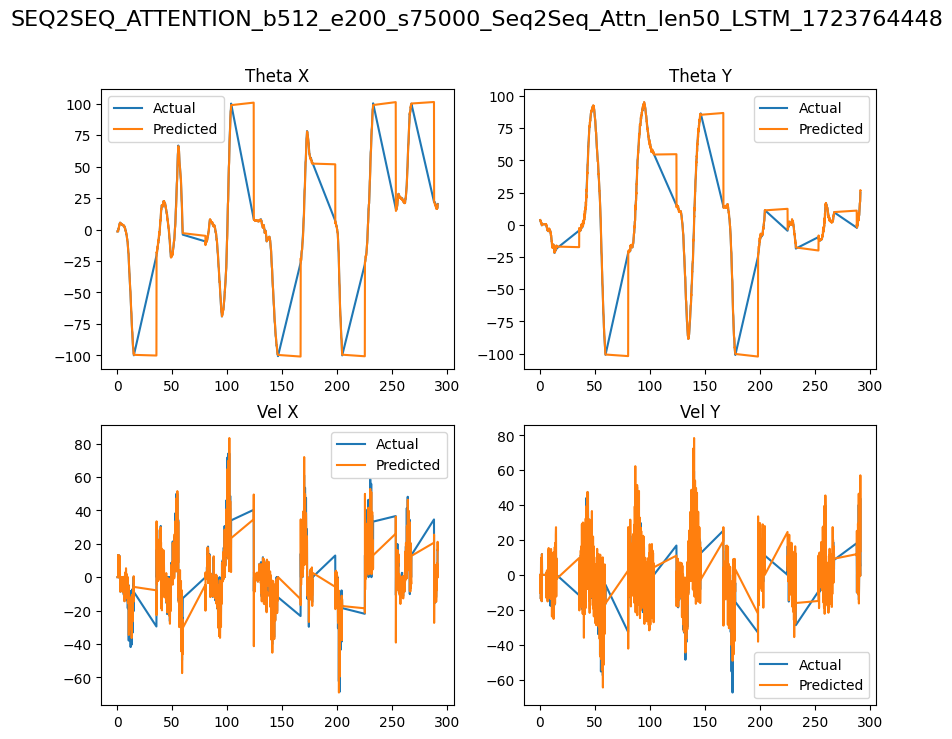

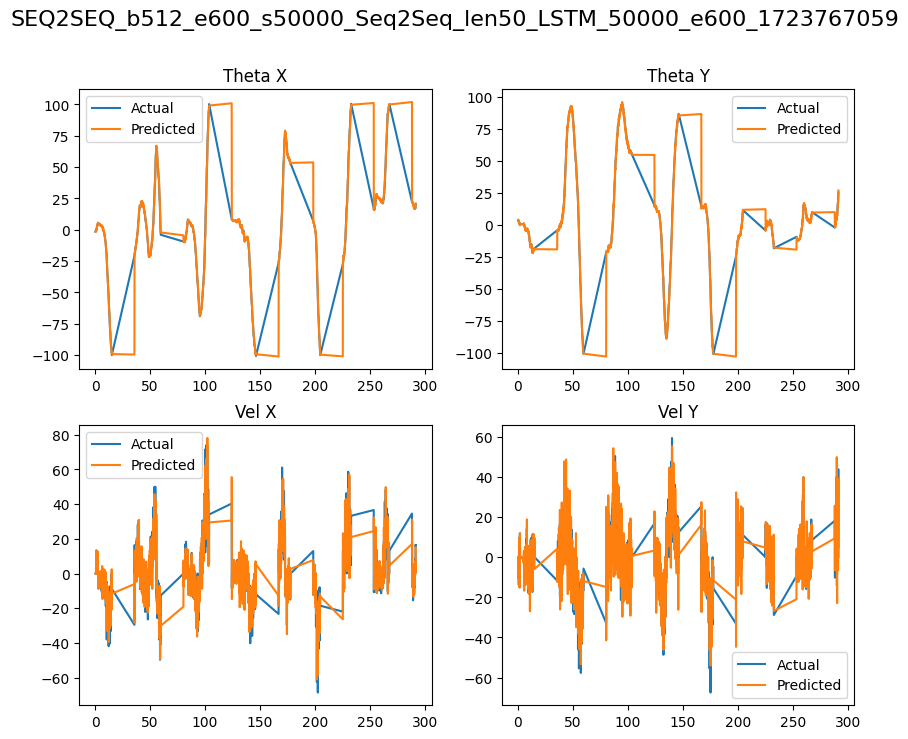

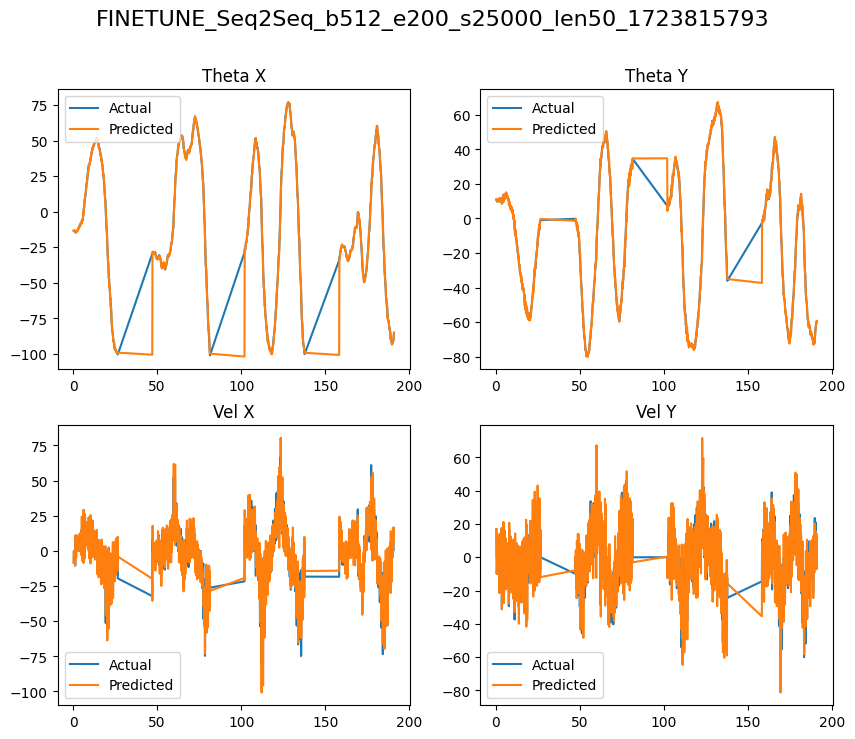

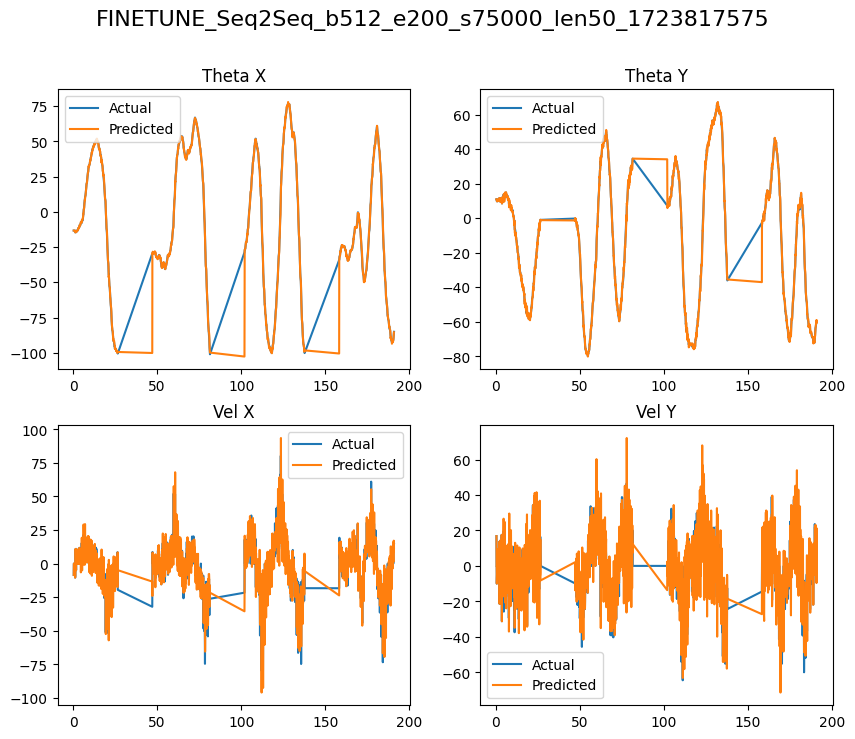

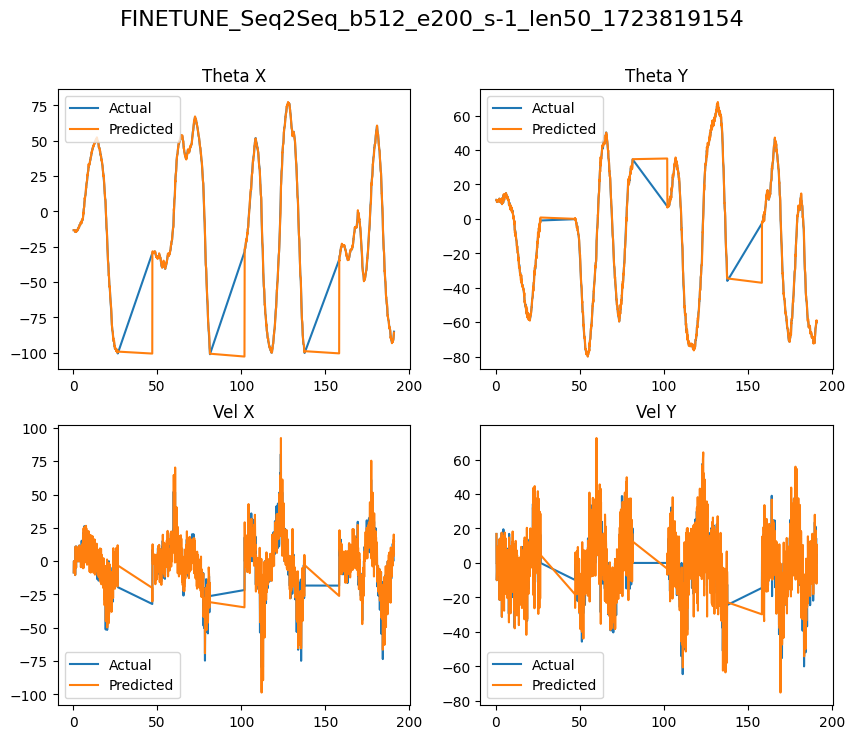

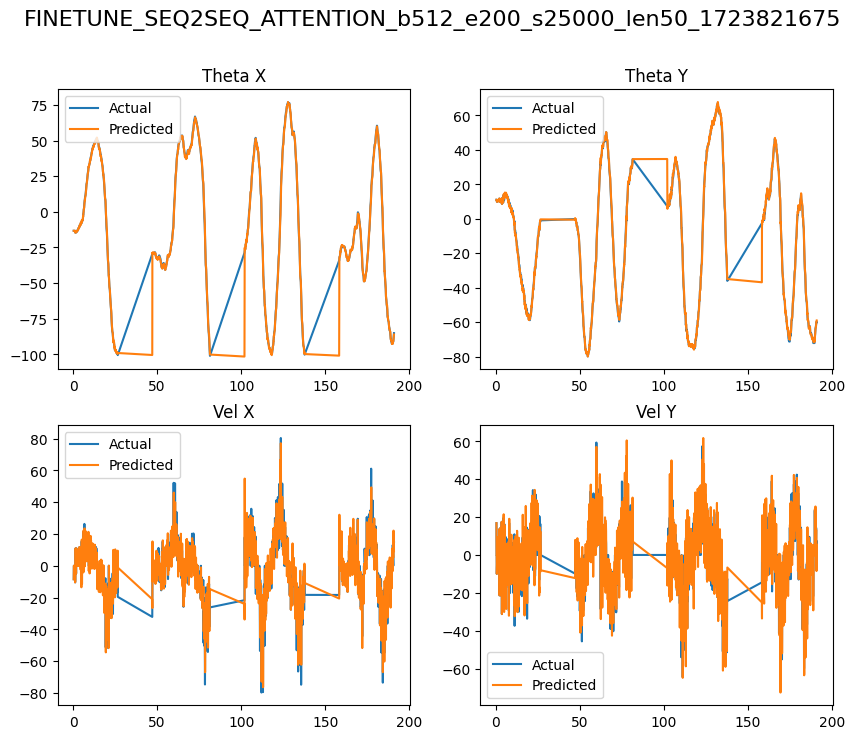

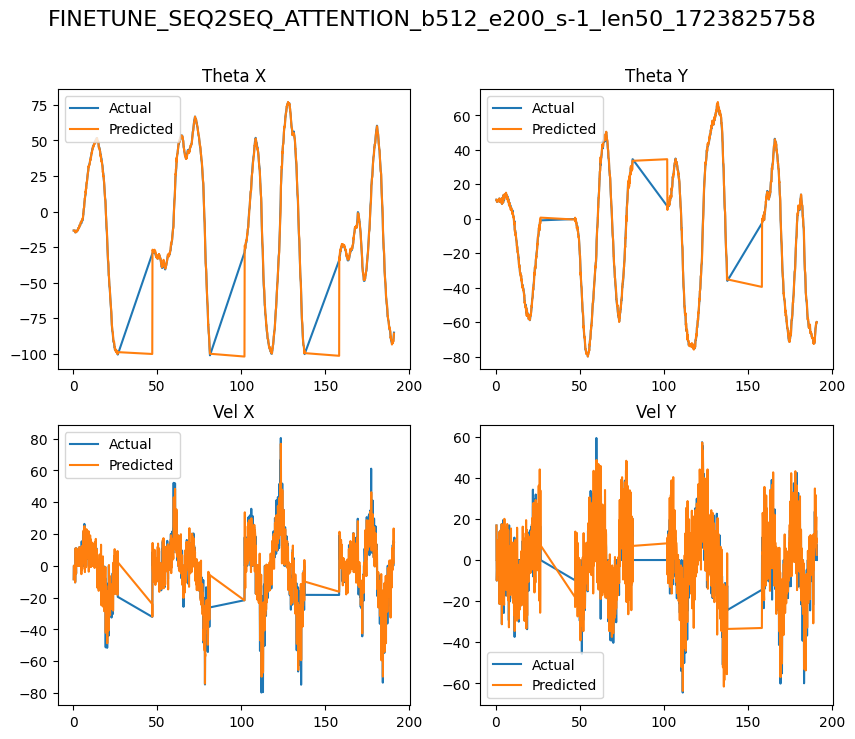

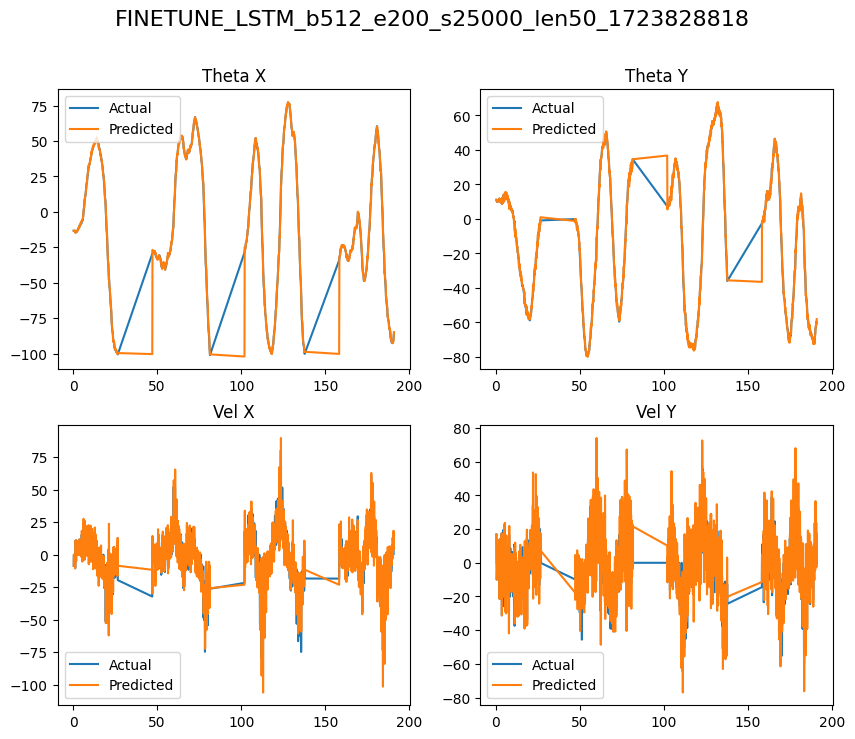

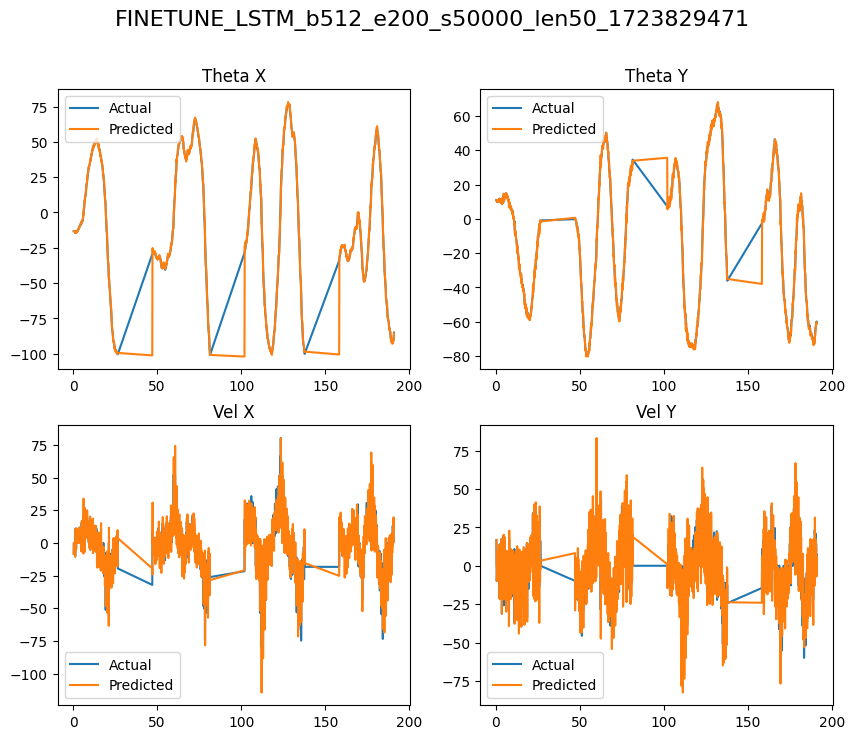

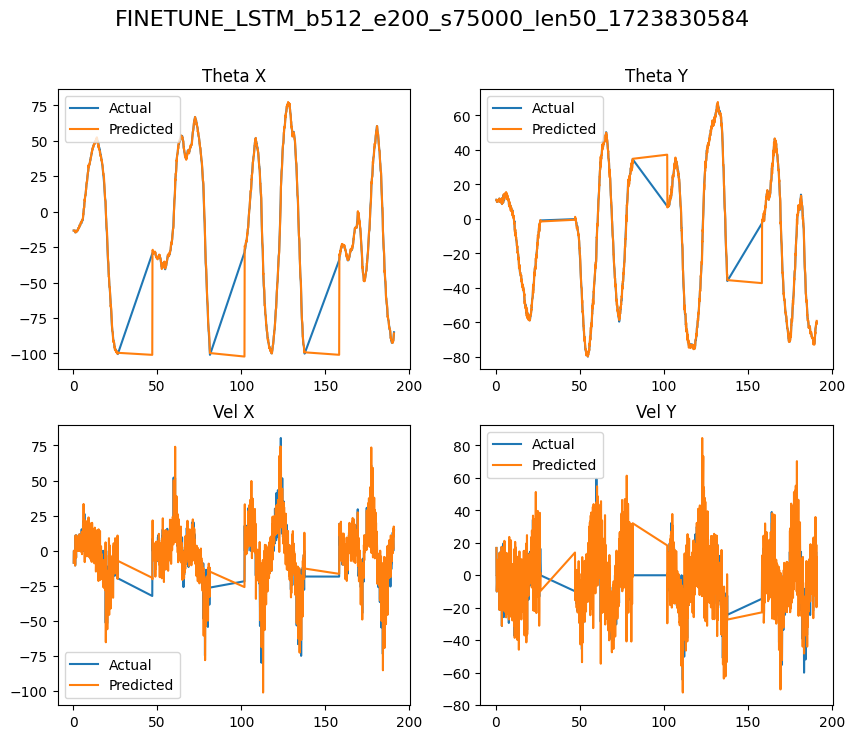

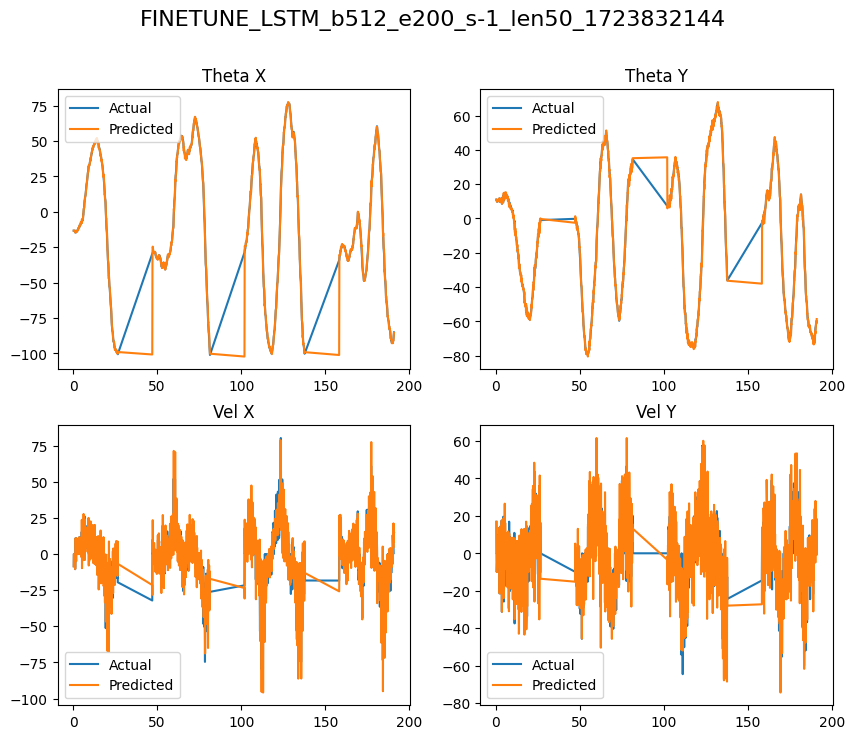

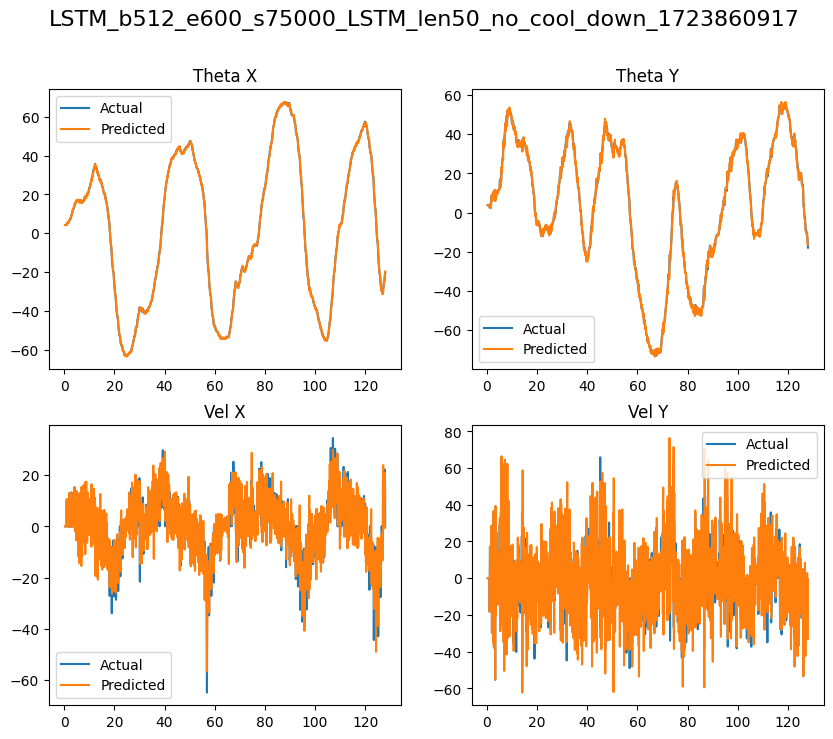

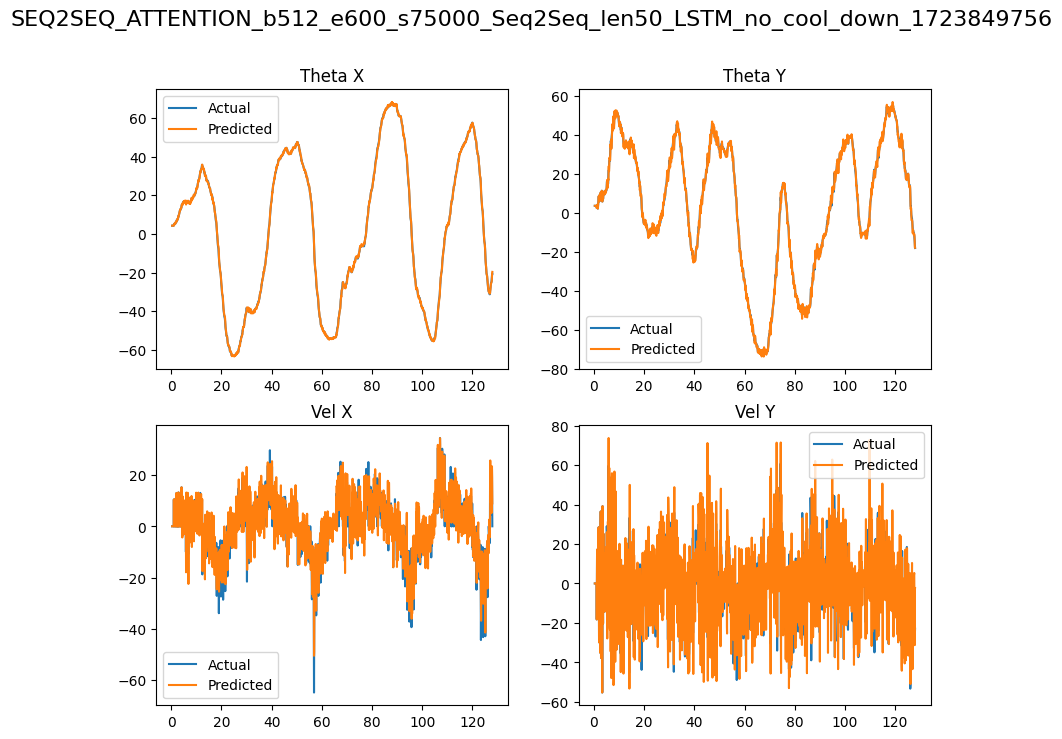

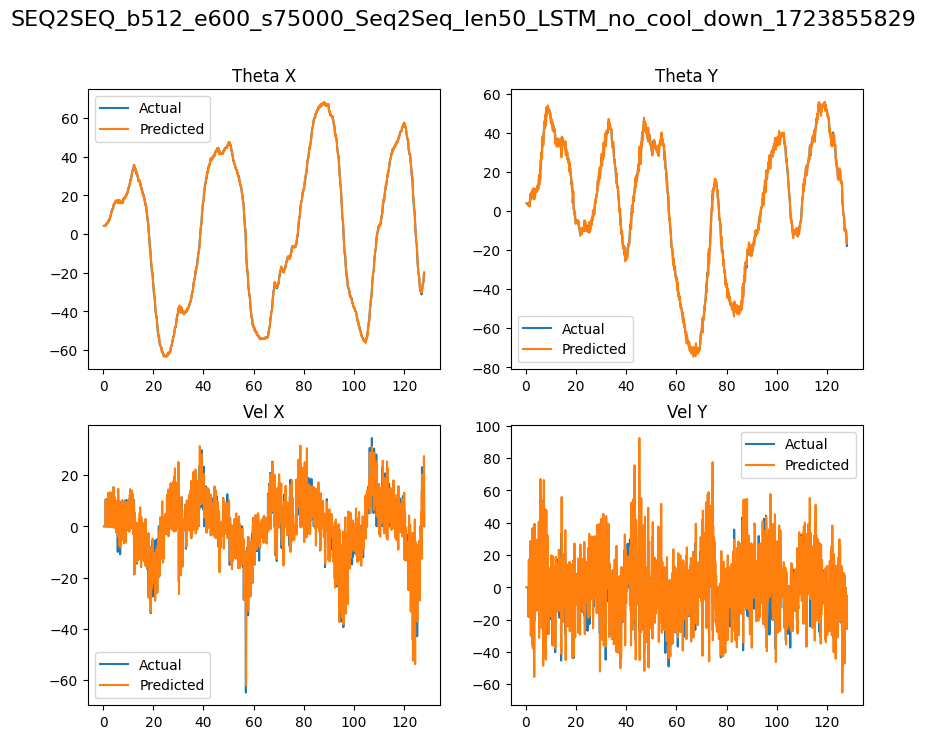

In [3]:
input_size = 6
hidden_size = 512
num_layers = 3
batch_size = 512
output_size = 4

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

files = os.listdir('../../model_weights/new_weights')

for file in tqdm(files):
    file_lower = file.lower()
    # skip RNN and MLP
    if 'rnn' in file_lower or 'mlp' in file_lower:
        continue
    
    if 'finetune' in file_lower:
        test_data_path = '../../ml_data/purple_test_data.csv'
    elif 'cool' in file_lower:
        test_data_path = '../../ml_data/purple_no_cool_down_test_data.csv'
    else:
        test_data_path = '../../ml_data/test_data.csv'
    filename = '../../model_weights/new_weights/' + file
    outputs_df, test_df, r2_score, rmse = rollout(filename,
                                                  test_data_path,
                                                  input_size,
                                                  hidden_size,
                                                  num_layers,
                                                  batch_size,
                                                  output_size,
                                                  device)
    fig = viz_graph(outputs_df, test_df, file)
    
    with open("../../results/"+file+".txt", 'w') as f:
        f.write("RMSE: " + str(rmse) + '\n')
        f.write("R^2: " + str(r2_score))
    
    fig.savefig("../../results/"+file+".jpg")
    fig.show()

In [4]:
outputs_df, test_df, r2_score, rmse = rollout('../../model_weights/new_weights/SEQ2SEQ_ATTENTION_b512_e200_s-1_Seq2Seq_len50_LSTM_1722928107',
                                              '../../ml_data/purple_test_data.csv',
                                                  input_size,
                                                  hidden_size,
                                                  num_layers,
                                                  batch_size,
                                                  output_size,
                                                  device)
fig = viz_graph(outputs_df, test_df, 'No Finetuning')
print(rmse)
print(r2_score)
fig.show()

/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/utils/utils.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locati

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


100%|██████████| 31243/31243 [03:53<00:00, 134.05it/s]


R^2 0.8221787214279175
RMSE 7.2825541496276855
tensor(7.2826, device='cuda:0')
tensor(0.8222, device='cuda:0')


In [3]:
input_size = 6
hidden_size = 512
num_layers = 3
batch_size = 512
output_size = 4
seq_len = 50
stateful = False

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model_path = "/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/model_weights/new_weights/LSTM_b512_e200_s-1_LSTM_len10_1722940896"
model_path = "../../model_weights/new_weights/SEQ2SEQ_ATTENTION_b512_e200_s-1_Seq2Seq_len50_LSTM_1722928107"
# model = FK_LSTM(input_size=input_size,
#                 hidden_size=hidden_size,
#                 num_layers=num_layers,
#                 batch_size=batch_size,
#                 output_size=output_size,
#                 device=device,
#                 batch_first=True).to(device=device)
# model.load_state_dict(torch.load(model_path, map_location=device))
# model.h0 = torch.zeros(num_layers, 1, hidden_size).to(device=device)
# model.c0 = torch.zeros(num_layers, 1, hidden_size).to(device=device)
model = FK_SEQ2SEQ(input_size=input_size,
                   embedding_size=hidden_size,
                   num_layers=num_layers,
                   batch_size=batch_size,
                   output_size=output_size,
                   device=device,
                   batch_first=True,
                   encoder_type='LSTM',
                   decoder_type='LSTM',
                   attention=True,
                   pred_len=1,
                   teacher_forcing_ratio=0.0).to(device=device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


/tmp/ipykernel_28833/3874726888.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


FK_SEQ2SEQ(
  (encoder): SEQ2SEQ_Encoder(
    (encoder): LSTM(6, 512, num_layers=3, batch_first=True)
  )
  (decoder): SEQ2SEQ_Decoder(
    (decoder): LSTM(6, 512, num_layers=3, batch_first=True)
    (fc): Linear(in_features=512, out_features=4, bias=True)
    (attention_layer): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
    )
    (fc1): Linear(in_features=6, out_features=512, bias=True)
    (fc2): Linear(in_features=512, out_features=6, bias=True)
  )
  (activation): Tanh()
)

In [4]:
test_df = pd.read_csv("../../ml_data/test_data.csv").dropna()
test_df


time_begin  time_begin_traj  theta_x  theta_y  vel_x      vel_y  \
0           0.348            0.348    -1.50     3.70    0.0   0.000000   
1           0.409            0.409    -1.50     3.07    0.0 -10.327869   
2           0.471            0.471    -1.50     3.07    0.0   0.000000   
3           0.532            0.532    -1.50     3.07    0.0   0.000000   
4           0.594            0.594    -1.50     3.07    0.0   0.000000   
...           ...              ...      ...      ...    ...        ...   
31261    1172.517          121.126   -22.03   -37.59    0.0   0.000000   
31262    1172.589          121.198   -22.03   -37.59    0.0   0.000000   
31263    1172.661          121.270   -22.03   -37.06    0.0   7.361111   
31264    1172.733          121.342   -22.03   -37.06    0.0   0.000000   
31265    1172.804          121.413   -22.03   -37.06    0.0   0.000000   

       X_throttle  Y_throttle  
0             0.0         0.0  
1             0.0         0.0  
2             0.0         0.0  
3             0.0         0.0  
4             0.0         0.0  
...           ...         ...  
31261        -2.0        10.0  
31262        -2.0        10.0  
31263        -2.0        10.0  
31264        -2.0        10.0  
31265        -2.0        10.0  

[31266 rows x 8 columns]

In [5]:
# test_df = test_df[['time_begin', 'time_begin_traj', 'theta_x', 'theta_y',
#        'X_throttle', 'Y_throttle' , 'vel_x', 'vel_y']]
# test_df = test_df.reindex(columns=['time_begin', 'time_begin_traj', 'theta_x', 'theta_y',
#        'X_throttle', 'Y_throttle' , 'vel_x', 'vel_y'], copy=False)
col_1 = test_df.pop('vel_x')
test_df.insert(7, col_1.name, col_1)
col_2 = test_df.pop('vel_y')
test_df.insert(7, col_2.name, col_2)
test_df

time_begin  time_begin_traj  theta_x  theta_y  X_throttle  Y_throttle  \
0           0.348            0.348    -1.50     3.70         0.0         0.0   
1           0.409            0.409    -1.50     3.07         0.0         0.0   
2           0.471            0.471    -1.50     3.07         0.0         0.0   
3           0.532            0.532    -1.50     3.07         0.0         0.0   
4           0.594            0.594    -1.50     3.07         0.0         0.0   
...           ...              ...      ...      ...         ...         ...   
31261    1172.517          121.126   -22.03   -37.59        -2.0        10.0   
31262    1172.589          121.198   -22.03   -37.59        -2.0        10.0   
31263    1172.661          121.270   -22.03   -37.06        -2.0        10.0   
31264    1172.733          121.342   -22.03   -37.06        -2.0        10.0   
31265    1172.804          121.413   -22.03   -37.06        -2.0        10.0   

       vel_x      vel_y  
0        0.0   0.000000  
1        0.0 -10.327869  
2        0.0   0.000000  
3        0.0   0.000000  
4        0.0   0.000000  
...      ...        ...  
31261    0.0   0.000000  
31262    0.0   0.000000  
31263    0.0   7.361111  
31264    0.0   0.000000  
31265    0.0   0.000000  

[31266 rows x 8 columns]

In [ ]:
from tqdm import tqdm
test_tensor = torch.tensor(test_df.values.copy(), dtype=torch.float32).to(device=device)
# obs_tensor = torch.tensor(test_df.drop(columns=["vel_x", "vel_y"]).values, dtype=torch.float32).to(device=device)
outputs = torch.zeros(test_df.shape).to(device=device)
outputs[:seq_len] = test_tensor[:seq_len].clone()
hn = torch.zeros(3, 1, 512).to(device=device)
cn = torch.zeros(3, 1, 512).to(device=device)
hidden = (hn, cn)
with torch.no_grad():
    for i in tqdm(range(seq_len, test_df.shape[0])):
        data = outputs[i - seq_len:i, :-2]
        time_begin, time_begin_traj, theta_x, theta_y, X_throttle, Y_throttle, vel_x, vel_y  = test_tensor[i - 1]
        if stateful:
            # delta_states, hn, cn = model(data.unsqueeze(0), hn, cn) LSTM
            delta_states, hidden = model(data.unsqueeze(0), None, hidden, mode='test')
        else:
            delta_states, _ = model(data.unsqueeze(0), None, hidden, mode='test')
        delta_states = delta_states.squeeze()
        time_begin_1, time_begin_traj_1, _, _, X_throttle_1, Y_throttle_1, _, _ = test_tensor[i]
        pred_theta_x, pred_theta_y, pred_vel_x, pred_vel_y = delta_states[0] + theta_x, delta_states[1] + theta_y, delta_states[2] + vel_x, delta_states[3] + vel_y
        outputs[i] = torch.tensor([time_begin_1, time_begin_traj_1, pred_theta_x, pred_theta_y, X_throttle_1, Y_throttle_1, pred_vel_x, pred_vel_y]).to(device=device)

In [23]:
outputs_df = pd.DataFrame(outputs.cpu().detach().numpy(), columns=test_df.columns)
output_states = torch.tensor(outputs_df[['theta_x', 'theta_y', 'vel_x', 'vel_y']].values, dtype=torch.float32).to(device=device)
test_states = torch.tensor(test_df[['theta_x', 'theta_y', 'vel_x', 'vel_y']].values, dtype=torch.float32).to(device=device)
from torcheval.metrics import R2Score
metric = R2Score()
metric.update(test_states, output_states)
r2_score = metric.compute()
print("R^2", r2_score.item())

rmse = torch.sqrt(nn.MSELoss()(test_states, output_states))
print("RMSE", rmse.item())

R^2 0.868349015712738
RMSE 8.600626945495605


In [21]:
outputs_df = pd.DataFrame(outputs.cpu().detach().numpy(), columns=test_df.columns)

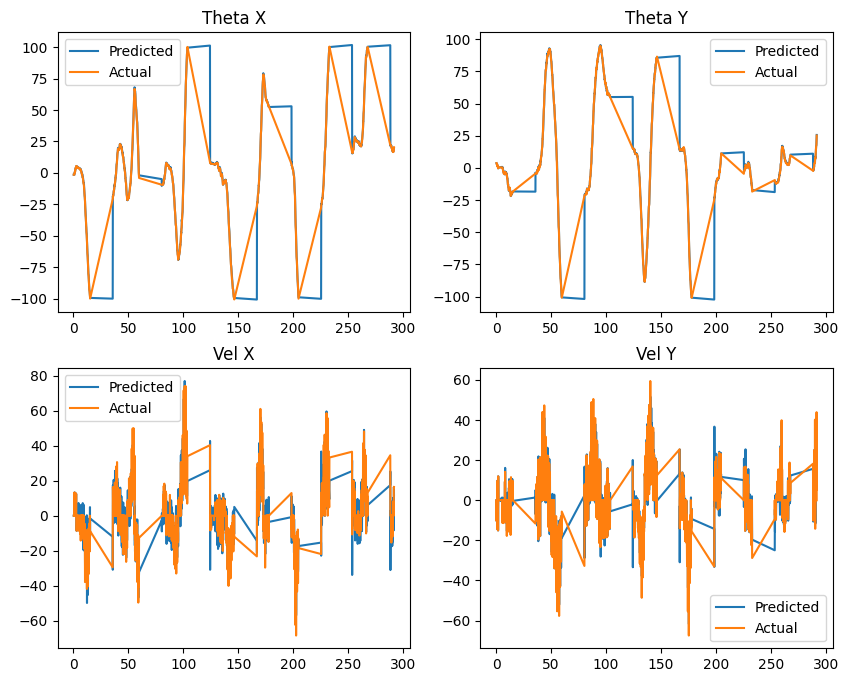

In [22]:
display_window = 1500
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(outputs_df["time_begin"][:display_window], outputs_df["theta_x"][:display_window], label="Predicted")
axs[0, 0].plot(test_df["time_begin"][:display_window], test_df["theta_x"][:display_window], label="Actual")
axs[0, 0].set_title("Theta X")
axs[0, 0].legend()
axs[0, 1].plot(outputs_df["time_begin"][:display_window], outputs_df["theta_y"][:display_window], label="Predicted")
axs[0, 1].plot(test_df["time_begin"][:display_window], test_df["theta_y"][:display_window], label="Actual")
axs[0, 1].set_title("Theta Y")
axs[0, 1].legend()
axs[1, 0].plot(outputs_df["time_begin"][:display_window], outputs_df["vel_x"][:display_window], label="Predicted")
axs[1, 0].plot(test_df["time_begin"][:display_window], test_df["vel_x"][:display_window], label="Actual")
axs[1, 0].set_title("Vel X")
axs[1, 0].legend()
axs[1, 1].plot(outputs_df["time_begin"][:display_window], outputs_df["vel_y"][:display_window], label="Predicted")
axs[1, 1].plot(test_df["time_begin"][:display_window], test_df["vel_y"][:display_window], label="Actual")
axs[1, 1].legend()
axs[1, 1].set_title("Vel Y")
fig.show()